## Where Do Strategic Minerals Come From?

The US Geological Survey publishes a list of Strategic Minerals ( https://www.usgs.gov/news/national-news-release/us-geological-survey-releases-2022-list-critical-minerals ). Having a secure supply of these minerals is essential to our security and economic prosperity. However many of these minerals are sourced from outside of the US. This assignment is to develop a reference catalog of the source or sources of each of these minerals and a judgement on the reliability of each source under stressed circumstance (e.g. war, economic crisis, etc.)

Notes:

You will need to identify a source or sources for each of the minerals in the 2022 List of Critical Minerals

You will need to categorize each source country as an ally, a competitor or a neutral party.

You will need to develop data visualizations that tell the story of source dependency and shortfall impact.

This assignment is due at the end of week fourteen of the semester

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from IPython.display import Image

Data Loading:

In [2]:
df_crit = pd.read_csv(r'G:\My Drive\CUNY SPS\class materials\Fall 2025\608\project7\crit_mineral.csv')
df_end_use = pd.read_csv(r'G:\My Drive\CUNY SPS\class materials\Fall 2025\608\project7\end_use.csv')
df_net_comm = pd.read_csv(r'G:\My Drive\CUNY SPS\class materials\Fall 2025\608\project7\num_comm.csv')
df_relationship = pd.read_csv(r'G:\My Drive\CUNY SPS\class materials\Fall 2025\608\project7\partnership.csv')

Data Cleaning:

In [3]:
#Convert percentage reliance to define numbers:
df_crit['Net_Import_Reliance'] = df_crit['Net_Import_Reliance'].str.replace(r'[<>]', '', regex=True)
df_crit['Net_Import_Reliance'] = df_crit['Net_Import_Reliance'].str.replace('E', '0')
df_crit['Net_Import_Reliance'] = df_crit['Net_Import_Reliance'].astype(int)

#Add a column with mineral count by country:
df_crit['Mineral_Count'] = df_crit.groupby('Primary_import_source')['Critical_mineral'].transform('count')

df_depend = df_crit[df_crit['Net_Import_Reliance'] != 0]
country_minerals = pd.DataFrame(df_depend.groupby('Primary_import_source')['Critical_mineral'].count().sort_values(ascending=False)).reset_index()

#Filter out non-numerical rows:
df_crit = df_crit[df_crit['Apparent_Consumption'] != 'W']
less_than_mask = df_crit['Apparent_Consumption'].astype(str).str.contains('<')

# 2. Clean strings: Remove '<' and ',' globally
df_crit['Apparent_Consumption'] = df_crit['Apparent_Consumption'].astype(str).str.replace(r'[<,]', '', regex=True)

# 3. Convert column to numerical:
df_crit['Apparent_Consumption'] = df_crit['Apparent_Consumption'].astype(float)

# 4. Apply the "half value" rule specifically to the identified rows
df_crit.loc[less_than_mask, 'Apparent_Consumption'] /= 2

#drop NaN values
df_crit = df_crit.dropna(subset=['Apparent_Consumption'])
#Remove Countries with 0 reliance
df_crit = df_crit[df_crit['Net_Import_Reliance'] != 0]

#Groupping minerals by rare earth metals:
df_end_use['grouped_name'] = np.where(df_end_use['Category_Note'] == 'Included in the Rare Earths chapter.', 'Rare earths', df_end_use['Critical Mineral'])

## Who are supplying most of the commodities to the U.S.?

In [4]:
fig = px.choropleth(
    df_net_comm,
    locations='Country',
    locationmode='country names',
    color='Commodity_Count',
    hover_name='Country',
    projection='natural earth',
    title='The US requires many countries to supply most of the nonfuel mineral commodities<br>Particularly from <b>China</b> and <b>Canada</b><br>',
    color_continuous_scale='temps',
    width=1000,
    height=600
)
fig.add_annotation(
    x=0.25, 
    y=0.85,
    xref="paper", yref="paper",
    text="Canada<br><b>23</b> types <br>of commodities</br>",
    showarrow=True,
    arrowhead=2,
    ax=-100,
    ay=80,
    font=dict(size=17)
)
fig.add_annotation(
    x=0.8,  # Adjust to point to Canada
    y=0.7,
    xref="paper", yref="paper",
    text="China<br><b>24</b> types <br>of commodities</br>",
    showarrow=True,
    arrowhead=2,
    ax=85,
    ay=25,
    font=dict(size=15)
)

fig.show()

C:\Users\godly\AppData\Local\Temp\ipykernel_28040\452834381.py:1: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


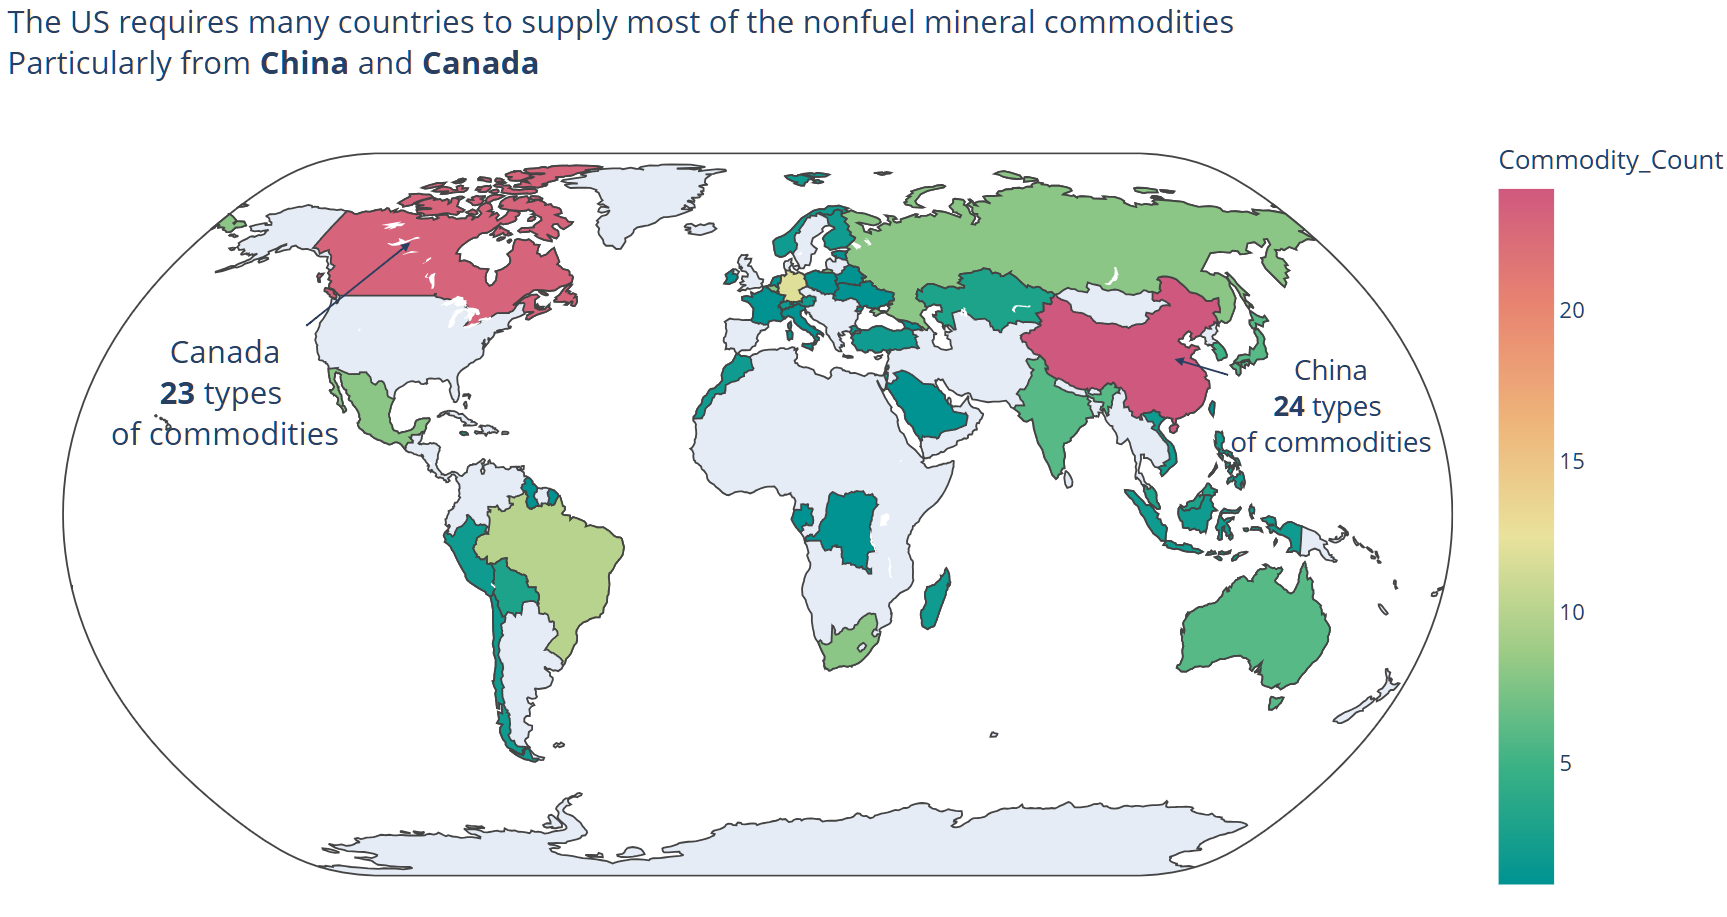

In [5]:
Image('1.png', width=800, height=600)

Plot 1: The US is heavily dependent on other countries for essential commodities. Cananda and China are the two biggest suppliers.

## Among these commoedities, what countries are the U.S. most reliant on critical minerals?

In [15]:
fig = px.sunburst(
    df_crit,
    path=['Primary_import_source', 'Critical_mineral'],
    values='Mineral_Count',
    color='Net_Import_Reliance',
    color_continuous_scale='RdBu',
    title='The U.S. is <b style="color:red; font-size: 20px">>80%</b> reliant on China for many critical minerals<br>China is also the sole supplier for many <b>rare earth minerals</b></br>',
    width=800,
    height=700,
    labels={'Primary_import_source': 'Import Source', 'Critical_mineral': 'Critical Mineral', 'Mineral_Count': 'Mineral Count', 'Net_Import_Reliance': 'Net Import Reliance'}
)
fig.update_layout(
    coloraxis_colorbar=dict(title='Net Import Reliance (%)')
)

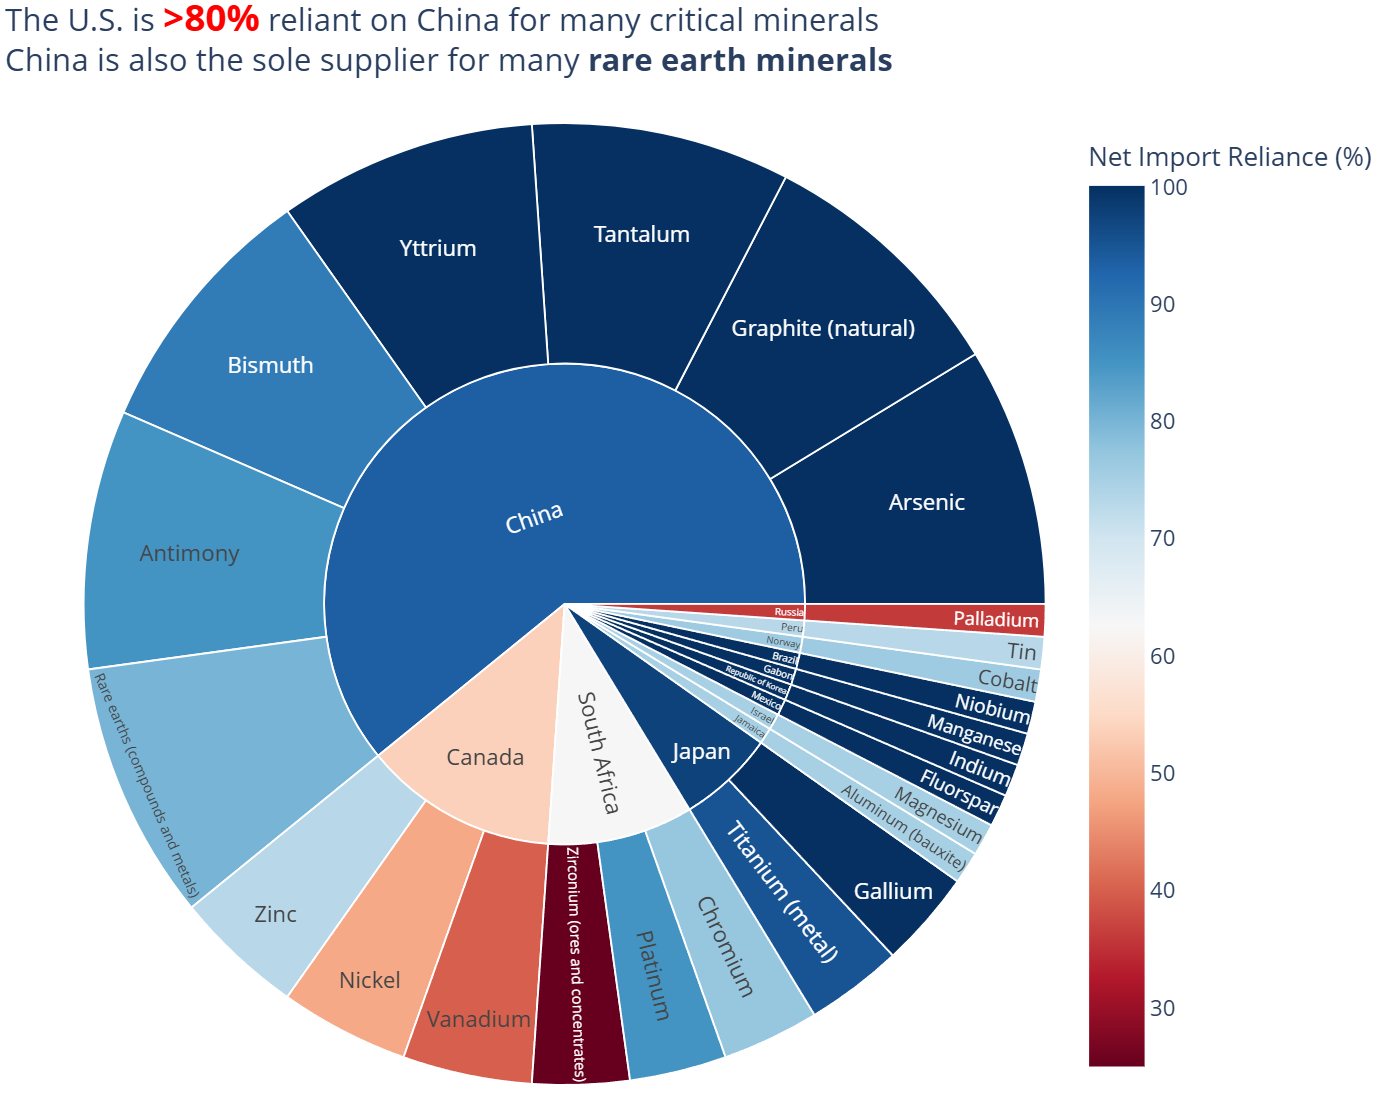

In [7]:
Image('2.png', width=800, height=600)

Plot 2: The US heavily relies on China to supply for many of its critical minerals. Among them, China is the ONLY supplier for rare earth minerals, which are crucial for many applications in the economy.

## What are the purposes of these critical minerals?

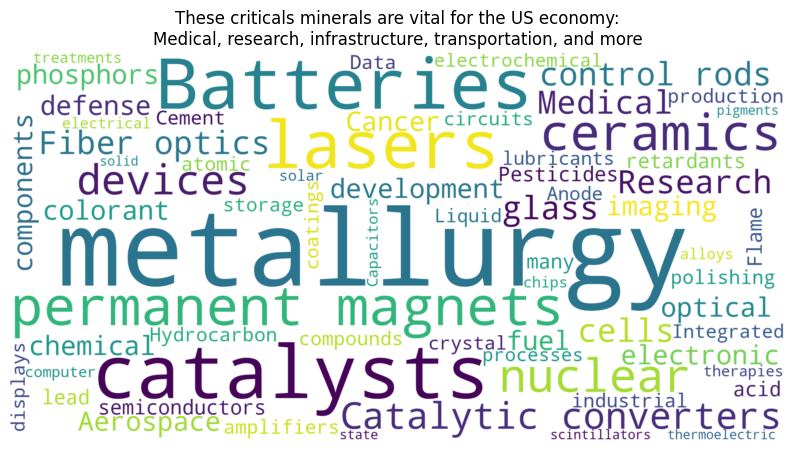

In [8]:
stop_word = STOPWORDS
stop_word.add('sectors')
stop_word.add('economy')

text = ' '.join(df_end_use['Primary Applications'])
wordcloud = WordCloud(
    stopwords = stop_word,
    background_color = 'white',
    random_state = 41,
    width=2000,
    height=1000
).generate(text)

plt.figure(figsize=(10,10))
plt.title('These criticals minerals are vital for the US economy:\nMedical, research, infrastructure, transportation, and more')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Plot 3: Majority of these critical minerals are refined and processed into important social infrastructures such as batteries, medical devices, and aerospace equipments. Without these equipments and devices, the US economy will be drastically reduced.

## What critical minerals are actively consumed by the U.S.?

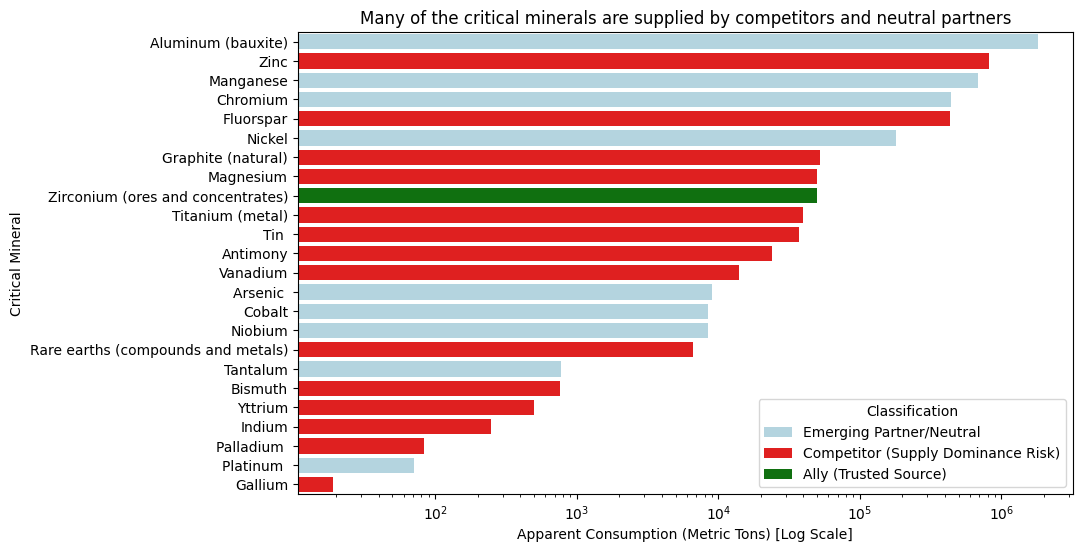

In [9]:
df_crit['Country'] = df_crit['Leading_source_country']
df_comb = pd.merge(df_crit, df_relationship, on='Country')

#Custom color set:
cus_color = {
    'Ally (Trusted Source)': 'green',
    'Competitor (Supply Dominance Risk)': 'red',
    'Emerging Partner/Neutral': 'lightblue'
}

plt.figure(figsize=(10,6))
sns.barplot(
    df_comb.sort_values('Apparent_Consumption', ascending = False), 
    x = 'Apparent_Consumption',
    y = 'Critical_mineral',
    hue = 'Classification',
    palette = cus_color
)
plt.xscale('log')
plt.xlabel('Apparent Consumption (Metric Tons) [Log Scale]')
plt.ylabel('Critical Mineral')
plt.title('Many of the critical minerals are supplied by competitors and neutral partners')
plt.show()

Plot 4: Based on the critical mineral consumptions in 2024, many of the minerals are being supplied by competitors rather than allies or neutral parties. This could be a vulnerability in the supply chain and the economy.

## Is the US critical mineral supply chain vulnerable?

In [10]:
# 1. Group by Classification and Country
risk_summary_detailed = df_comb.groupby(['Classification', 'Leading_source_country'])['Apparent_Consumption'].sum().reset_index()

# 2. Calculate percentage of TOTAL consumption for valid numeric labels
total_consumption = risk_summary_detailed['Apparent_Consumption'].sum()
risk_summary_detailed['Percentage'] = (risk_summary_detailed['Apparent_Consumption'] / total_consumption * 100).round(1).astype(str) + '%'

# 3. Create a combined specific label column
risk_summary_detailed['Label'] = risk_summary_detailed['Leading_source_country'] + " (" + risk_summary_detailed['Percentage'] + ")"

# 4. Create the plot using the new 'Label' for the text
fig_ending = px.bar(
    risk_summary_detailed, 
    x='Apparent_Consumption', 
    y='Classification', 
    text='Label',             
    color='Classification',
    orientation='h',
    title='<b style="color:red">31.7%</b> of US critical mineral is supplied by China ONLY.<br>The US critical mineral supply chain is extremely vulnerable to <b style="color:red">Competitor disruption</b>.',
    subtitle='The US should focus on diversifying supply acquisition from <b style="color:blue">Emerging/Neutral Partners.</b>',
    color_discrete_map={
        'Ally (Trusted Source)': 'green',
        'Competitor (Supply Dominance Risk)': 'red',
        'Emerging Partner/Neutral': 'lightblue'
    },
    width=1200,
    height=500,
)

# 5. formatting to ensure labels fit inside the bars
fig_ending.update_traces(textposition='inside', insidetextanchor='middle')
fig_ending.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig_ending.show()

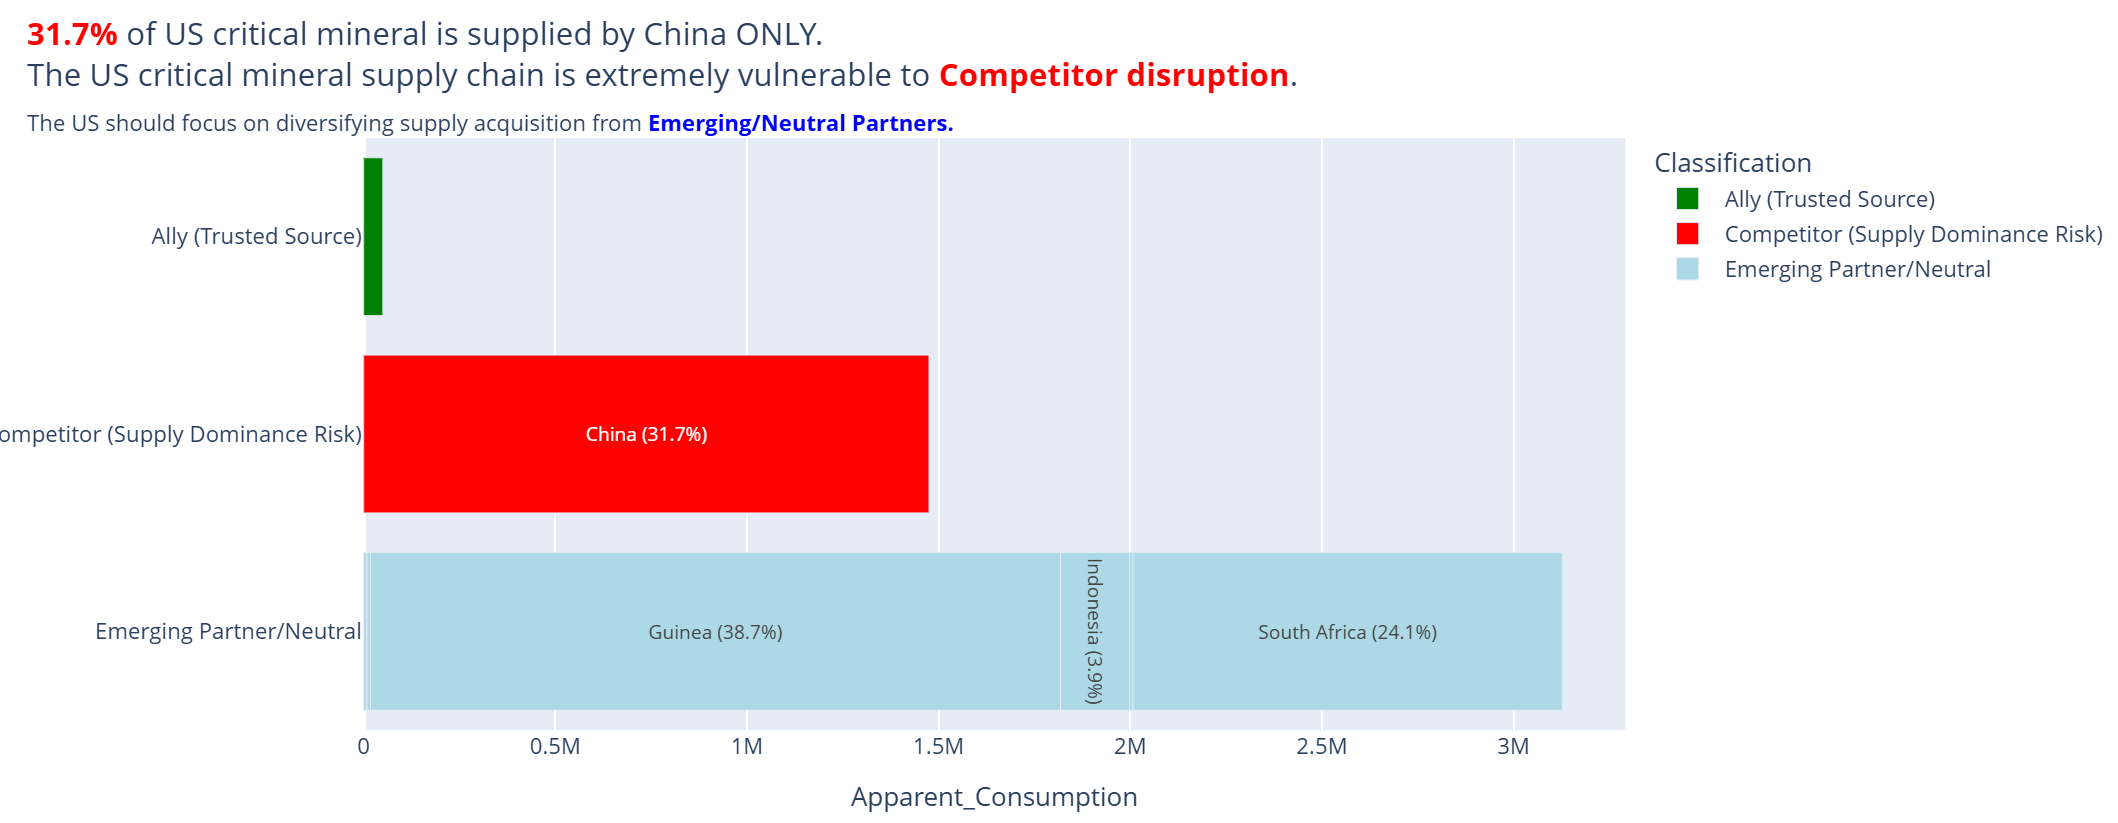

In [11]:
Image('3.png', width=1000, height=600)

Plot 5: China alone accounts for 31.7% of the US critical mineral consumption is a statement of how vulnerable the current supply chain is. Any distrubtion of such supply chain can translate into an unaccountable amount of economical damage to the country. The US should consider diversifying its critical mineral acqusition strategy to other countries or to boost up its domestic mineral harvest.

## Conclusion:

Given the substantial reliance on foreign countries for mineral imports, the U.S. is vulnerable to antagonistic supply chain disruptions by competitors. This is especially apparent in the case of critical minerals, which are essential for the U.S. economy and national security. As shown above, many of the critical minerals are primarily imported from China, which has a global dominace of rare earth minerals. Without these critical minerals and rare earth minerals, sectors such as high-end technology, national defense, infrastructure, and advanced manufacturing are significantly impacted. The U.S. must develop proactive plans and strategies to reduce its reliance on competitors such as China.